<h1>Data Analysis of the dataset</h1>

In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: C:\Users\Shubhi Agarwal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
df = pd.read_csv('extracted_data.csv')
df.columns

Index(['article_id', 'url_x', 'image_url_x', 'headline_x', 'desc_x', 'label_x',
       'modified_title', 'Fake_headline_x', 'Unnamed: 0', 'headline_y',
       'desc_y', 'date', 'url_y', 'articles', 'article_type', 'article_length',
       'label_y', 'image_url_y', 'headline', 'Fake_headline_y', 'desc', 'url'],
      dtype='object')

In [45]:
df.head()

,article_id,url_x,image_url_x,headline_x,desc_x,label_x,modified_title,Fake_headline_x,Unnamed: 0,headline_y,...,url_y,articles,article_type,article_length,label_y,image_url_y,headline,Fake_headline_y,desc,url
0,INDEXP11249,https://indianexpress.com/article/india/flying...,https://images.indianexpress.com/2019/11/Dhank...,"Flying objects existed during Ramayana days, A...",Bengali scientist Bikash Sinha criticised the ...,NEGATIVE,"Flying objects existed during Ramayana days, A...","Flying objects existed during Ramayana days, A...",8751,"Flying objects existed during Ramayana days, A...",...,https://indianexpress.com/article/india/flying...,A two-seater aircraft crashed in Odisha's Dhen...,short,753,NEGATIVE,https://images.indianexpress.com/2019/11/Dhank...,"Flying objects existed during Ramayana days, A...","Flying objects existed during Ramayana days, A...",The two were taken to a nearby hospital in Kam...,https://indianexpress.com/article/india/traine...
1,INDEXP11246,https://indianexpress.com/article/india/critic...,https://images.indianexpress.com/2019/11/Mamat...,Criticised for meeting Modi: We show courtesy ...,The Congress and Left Front had questioned the...,NEGATIVE,praised against meeting Modi: We show courtesy...,Criticised against meeting Modi: We show court...,8754,Criticised for meeting Modi: We show courtesy ...,...,https://indianexpress.com/article/india/critic...,Hotels located in non-containment zones can re...,long,2424,NEGATIVE,https://images.indianexpress.com/2019/11/Mamat...,Criticised for meeting Modi: We show courtesy ...,Criticised against meeting Modi: We show court...,All hotels/ B&B/ Homestay & hospitality servic...,https://indianexpress.com/article/india/touris...
2,INDEXP11243,https://indianexpress.com/article/india/caa-vi...,https://images.indianexpress.com/2019/12/vijay...,CAA violates basic structure: Kerala is first ...,it’s a colourable legislation... in violation ...,NEGATIVE,CAA violates basic structure: Kerala is first ...,CAA violates basic structure: Kerala is first ...,8757,CAA violates basic structure: Kerala is first ...,...,https://indianexpress.com/article/india/caa-vi...,Four militants were killed and two security pe...,long,1088,NEGATIVE,https://images.indianexpress.com/2019/12/vijay...,CAA violates basic structure: Kerala is first ...,CAA violates basic structure: Kerala is first ...,The gunfight comes a day after five militants ...,https://indianexpress.com/article/india/shopai...
3,INDEXP11240,https://indianexpress.com/article/india/will-b...,https://images.indianexpress.com/2018/06/jnu-v...,Will be lenient if students join proctor inqui...,"In an interview to The Indian Express, Kumar s...",POSITIVE,Will be lenient if students join proctor inqui...,Will be lenient if students join proctor inqui...,8760,Will be lenient if students join proctor inqui...,...,https://indianexpress.com/article/india/will-b...,Private offices in Mumbai are set to reopen on...,long,1802,POSITIVE,https://images.indianexpress.com/2018/06/jnu-v...,Will be lenient if students join proctor inqui...,Will be lenient if students join proctor inqui...,Mumbai Traffic Police have prepared for a surg...,https://indianexpress.com/article/india/corona...
4,INDEXP11239,https://indianexpress.com/article/india/agusta...,https://images.indianexpress.com/2019/11/ratul...,AgustaWestland chopper scam: Delhi HC dismisse...,"“No doubt, the bail can be cancelled only in t...",NEGATIVE,AgustaWestland chopper scam: Delhi HC dismisse...,AgustaWestland chopper scam: Delhi HC misses E...,8761,AgustaWestland chopper scam: Delhi HC dismisse...,...,https://indianexpress.com/article/india/agusta...,Four days after bureaucrat-turned-politician S...,short,3045,NEGATIVE,https://images.indianexpress.com/2019/11/ratul...,AgustaWestland chopper scam: Delhi HC dismisse...,AgustaWestland chopper scam: Delhi HC misses E...,Faesal and two PDP leaders—Peer Mansoor and Sa...,https://indianexpress.com/article/india/pdp-nc...


In [46]:
# Find the minimum and maximum values in the 'article_length' column
min_length = df['article_length'].min()
max_length = df['article_length'].max()

print("Minimum Article Length:", min_length)
print("Maximum Article Length:", max_length)


Minimum Article Length: 753
Maximum Article Length: 11463


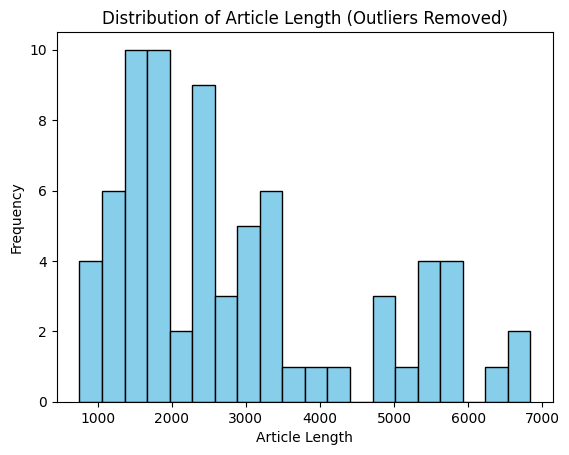

In [47]:
Q1 = df['article_length'].quantile(0.25)
Q3 = df['article_length'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = df[(df['article_length'] >= lower_bound) & (df['article_length'] <= upper_bound)]

# Plot histogram of filtered article lengths
plt.hist(filtered_df['article_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Length (Outliers Removed)')
plt.show()

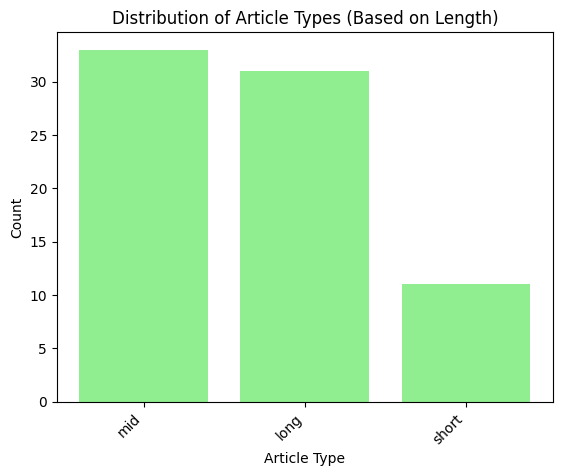

In [48]:
# Plot bar chart of article types
article_type_counts = df['article_type'].value_counts()
plt.bar(article_type_counts.index, article_type_counts.values, color='lightgreen')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.title('Distribution of Article Types (Based on Length)')
plt.xticks(rotation=45, ha='right')
plt.show()


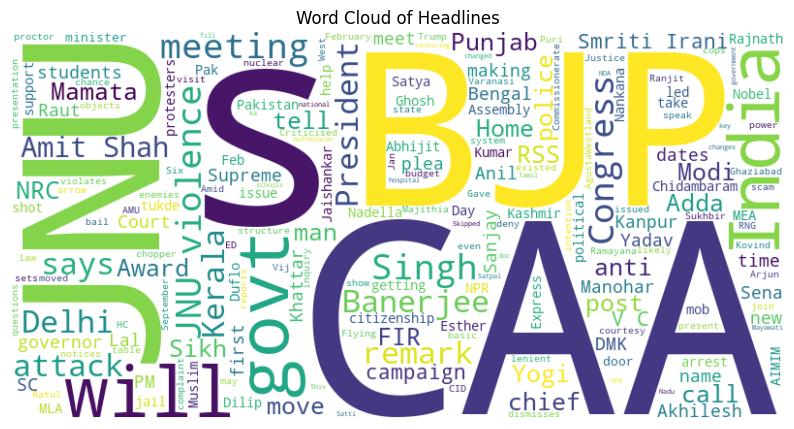

In [49]:
headline_text = ' '.join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(headline_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

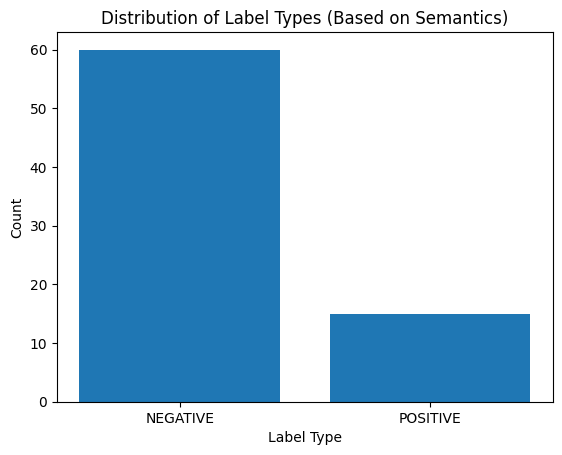

In [50]:
label_counts = df_2['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Distribution of Label Types (Based on Semantics)')
plt.xticks( )
plt.show()
